
# Web Scraping of Numbers Website




In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
url="https://www.the-numbers.com/movie/budgets/all"

In [ ]:
page=requests.get(url)

In [ ]:
print(page)

<Response [403]>


In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.3'}

In [ ]:
response=requests.get(url, headers=headers)

In [ ]:
response

<Response [200]>

In [ ]:
soup=BeautifulSoup(response.content,'html.parser')

In [ ]:
print(soup)

<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<link href="/images/logo_2021/favicon.ico" rel="icon"/>
<meta content="nofollow, NOARCHIVE, NOODP, NOYDIR" name="robots"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<!-- Google tag (gtag.js) -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5K2DT3XQN5"></script>






</script>







</script>-->
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins">
<script cro

In [ ]:
tb=soup.find_all('table')

In [ ]:
print(tb)

[<table>
<tr><th> </th><th>Release<br/>Date</th><th>Movie</th><th>Production<br/>Budget</th><th>Domestic<br/>Gross</th><th>Worldwide<br/>Gross</th></tr>
<tr><td class="data">1</td>
<td><a href="/box-office-chart/daily/2022/12/09">Dec 9, 2022</a></td>
<td><b><a href="/movie/Avatar-The-Way-of-Water-(2022)#tab=summary">Avatar: The Way of Water</a></b></td>
<td class="data"> $460,000,000</td>
<td class="data"> $683,064,773</td>
<td class="data"> $2,316,778,069</td>
</tr>
<tr><td class="data">2</td>
<td><a href="/box-office-chart/daily/2019/04/23">Apr 23, 2019</a></td>
<td><b><a href="/movie/Avengers-Endgame-(2019)#tab=summary">Avengers: Endgame</a></b></td>
<td class="data"> $400,000,000</td>
<td class="data"> $858,373,000</td>
<td class="data"> $2,794,731,755</td>
</tr>
<tr><td class="data">3</td>
<td><a href="/box-office-chart/daily/2011/05/20">May 20, 2011</a></td>
<td><b><a href="/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary">Pirates of the Caribbean: On Stranger Tides<

In [ ]:
tb1=soup.find('table')

In [ ]:
type(tb1)

bs4.element.Tag

In [ ]:
# Obtain every title of columns with tag <th>
headers1 = []
for i in tb1.find_all('td'):

  title = i.text.replace('\xa0','')
  headers1.append(title)

In [ ]:
print(headers1)

['1', 'Dec 9, 2022', 'Avatar: The Way of Water', '$460,000,000', '$683,064,773', '$2,316,778,069', '2', 'Apr 23, 2019', 'Avengers: Endgame', '$400,000,000', '$858,373,000', '$2,794,731,755', '3', 'May 20, 2011', 'Pirates of the Caribbean: On Stranger Tides', '$379,000,000', '$241,071,802', '$1,045,713,802', '4', 'Apr 22, 2015', 'Avengers: Age of Ultron', '$365,000,000', '$459,005,868', '$1,395,316,979', '5', 'May 17, 2023', 'Fast X', '$340,000,000', '$0', '$0', '6', 'Dec 16, 2015', 'Star Wars Ep. VII: The Force Awakens', '$306,000,000', '$936,662,225', '$2,064,615,817', '7', 'Apr 25, 2018', 'Avengers: Infinity War', '$300,000,000', '$678,815,482', '$2,048,359,754', '8', 'May 24, 2007', 'Pirates of the Caribbean: At Worldâ\x80\x99s End', '$300,000,000', '$309,420,425', '$960,996,492', '9', 'Nov 13, 2017', 'Justice League', '$300,000,000', '$229,024,295', '$655,945,209', '10', 'Oct 6, 2015', 'Spectre', '$300,000,000', '$200,074,175', '$879,077,344', '11', 'Jul 12, 2023', 'Mission: Imposs

In [ ]:
#pandas comes with numpy
import numpy as np
import pandas as pd

# this makes a normal python list for integers 1-9
input = list()

#lets convert that to numpy array as np.array
num = np.array(headers1)

#currently its shape is single dimensional, lets change that to a two dimensional matrix that turns it into the clean breaks you want
reshaped = num.reshape(-1,6)

#now construct a beautiful table
df1=pd.DataFrame(reshaped, columns=['Index','Release Date','Movie','Production Budget','Domestic Gross','Worldwide Gross'])


In [ ]:
df1

,Index,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069"
1,2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755"
2,3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,4,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,5,"May 17, 2023",Fast X,"$340,000,000",$0,$0
...,...,...,...,...,...,...
95,96,"May 16, 2013",Star Trek Into Darkness,"$190,000,000","$228,778,661","$467,381,584"
96,97,"Jun 19, 2013",World War Z,"$190,000,000","$202,706,711","$531,861,650"
97,98,"May 10, 2013",The Great Gatsby,"$190,000,000","$144,840,419","$353,640,419"
98,99,"Nov 6, 2009",Disneyâs A Christmas Carol,"$190,000,000","$137,855,863","$315,709,697"


In [ ]:
headers2=[]
url="https://www.the-numbers.com/movie/budgets/all"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.3'}



for page in range(101,6386,100):

  req=requests.get(url+ '/' +str(page) , headers=headers)

  soup=BeautifulSoup(req.content,'html.parser')
  #soup = BeautifulSoup(req.text, 'html.parser')
  tb1=soup.find('table')
  # Obtain every title of columns with tag <th>

  for i in tb1.find_all('td'):

    title = i.text.replace('\xa0','')
    headers2.append(title)

In [ ]:
headers2

['101',
 'Dec 16, 2021',
 'The Matrix Resurrections',
 '$190,000,000',
 '$40,463,197',
 '$159,197,755',
 '102',
 'Nov 25, 2015',
 'The Good Dinosaur',
 '$187,500,000',
 '$123,087,120',
 '$333,771,037',
 '103',
 'May 2, 2008',
 'Iron Man',
 '$186,000,000',
 '$318,604,126',
 '$585,171,547',
 '104',
 'Jul 11, 2008',
 'The Dark Knight',
 '$185,000,000',
 '$534,987,076',
 '$1,006,234,167',
 '105',
 'May 22, 2008',
 'Indiana Jones and the Kingdom of the Crystal Skull',
 '$185,000,000',
 '$317,101,119',
 '$786,635,413',
 '106',
 'Jun 21, 2012',
 'Brave',
 '$185,000,000',
 '$237,282,182',
 '$554,606,532',
 '107',
 'Feb 23, 2017',
 'Kong: Skull Island',
 '$185,000,000',
 '$168,052,812',
 '$561,072,059',
 '108',
 'Jul 21, 2016',
 'Star Trek Beyond',
 '$185,000,000',
 '$158,848,340',
 '$335,673,708',
 '109',
 'Oct 17, 2019',
 'Maleficent: Mistress of Evil',
 '$185,000,000',
 '$113,929,605',
 '$489,181,357',
 '110',
 'Sep 29, 2017',
 'Blade Runner 2049',
 '$185,000,000',
 '$92,054,159',
 '$258,829

In [ ]:
#pandas comes with numpy
import numpy as np
import pandas as pd

# this makes a normal python list for integers 1-9
input = list()

#lets convert that to numpy array as np.array
num = np.array(headers2)

#currently its shape is single dimensional, lets change that to a two dimensional matrix that turns it into the clean breaks you want
reshaped = num.reshape(-1,6)

#now construct a beautiful table
df2=pd.DataFrame(reshaped, columns=['Index','Release Date','Movie','Production Budget','Domestic Gross','Worldwide Gross'])

In [ ]:
df2

,Index,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,101,"Dec 16, 2021",The Matrix Resurrections,"$190,000,000","$40,463,197","$159,197,755"
1,102,"Nov 25, 2015",The Good Dinosaur,"$187,500,000","$123,087,120","$333,771,037"
2,103,"May 2, 2008",Iron Man,"$186,000,000","$318,604,126","$585,171,547"
3,104,"Jul 11, 2008",The Dark Knight,"$185,000,000","$534,987,076","$1,006,234,167"
4,105,"May 22, 2008",Indiana Jones and the Kingdom of the Crystal S...,"$185,000,000","$317,101,119","$786,635,413"
...,...,...,...,...,...,...
6281,"6,382","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6282,"6,383","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6283,"6,384","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6284,"6,385","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
df=[df1,df2]

In [ ]:
df_result=pd.concat(df)

In [ ]:
print(df_result)

      Index  Release Date                                        Movie  \
0         1   Dec 9, 2022                     Avatar: The Way of Water   
1         2  Apr 23, 2019                            Avengers: Endgame   
2         3  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3         4  Apr 22, 2015                      Avengers: Age of Ultron   
4         5  May 17, 2023                                       Fast X   
...     ...           ...                                          ...   
6281  6,382   Apr 2, 1999                                    Following   
6282  6,383  Jul 13, 2005                Return to the Land of Wonders   
6283  6,384  Sep 29, 2015                         A Plague So Pleasant   
6284  6,385   Aug 5, 2005                            My Date With Drew   
6285  6,386   Mar 2, 2021                                       Neeras   

     Production Budget Domestic Gross Worldwide Gross  
0         $460,000,000   $683,064,773  $2,316,778,069  

In [ ]:
df_result.to_csv("numbers.csv")

In [ ]:
data=pd.read_csv("numbers.csv")

In [ ]:
data

,Unnamed: 0,Index,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,0,1,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069"
1,1,2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755"
2,2,3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,3,4,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,4,5,"May 17, 2023",Fast X,"$340,000,000",$0,$0
...,...,...,...,...,...,...,...
6381,6281,"6,382","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6382,6282,"6,383","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6383,6283,"6,384","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6384,6284,"6,385","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
data=data.drop('Index', axis=1)

In [ ]:
data

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,0,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069"
1,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755"
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,4,"May 17, 2023",Fast X,"$340,000,000",$0,$0
...,...,...,...,...,...,...
6381,6281,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6382,6282,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6383,6283,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6384,6284,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
data=data.drop('Unnamed: 0', axis=1)

In [ ]:
data

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069"
1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,"May 17, 2023",Fast X,"$340,000,000",$0,$0
...,...,...,...,...,...
6381,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6382,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6383,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6384,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
Release_Date_new=[]
from datetime import datetime


def mdy_to_ymd(rel):
  for d in rel:

    try:
     #print(datetime.strptime(d,'%b %d, %Y' ))
     Release_Date_new.append(datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d'))
    except ValueError:
      Release_Date_new.append("Not in correct format")

  return Release_Date_new


In [ ]:
data['Release_Date_New']=mdy_to_ymd(data['Release Date'])

In [ ]:
data

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Release_Date_New
0,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,"May 17, 2023",Fast X,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...,...
6381,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999-04-02
6382,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
6383,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015-09-29
6384,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",2005-08-05


In [ ]:
data['Release_Date_New'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6386 entries, 0 to 6385
Series name: Release_Date_New
Non-Null Count  Dtype 
--------------  ----- 
6386 non-null   object
dtypes: object(1)
memory usage: 50.0+ KB


In [ ]:
data=data.drop('Release Date', axis=1)

In [ ]:
data

,Movie,Production Budget,Domestic Gross,Worldwide Gross,Release_Date_New
0,Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,Fast X,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...
6381,Following,"$6,000","$48,482","$240,495",1999-04-02
6382,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
6383,A Plague So Pleasant,"$1,400",$0,$0,2015-09-29
6384,My Date With Drew,"$1,100","$181,041","$181,041",2005-08-05


In [ ]:
data.rename(columns = {'Release_Date_New':'Release Date'}, inplace = True)


In [ ]:
data

,Movie,Production Budget,Domestic Gross,Worldwide Gross,Release Date
0,Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,Fast X,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...
6381,Following,"$6,000","$48,482","$240,495",1999-04-02
6382,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
6383,A Plague So Pleasant,"$1,400",$0,$0,2015-09-29
6384,My Date With Drew,"$1,100","$181,041","$181,041",2005-08-05


# Loading all remaining datasets

In [ ]:
credit_dataset=pd.read_csv("/content/tmdb_5000_credits.csv")
tag_dataset=pd.read_csv("/content/all_data_tags.csv")
numbers_dataset=data

In [ ]:
credit_dataset.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
tag_dataset.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [ ]:
tag_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          14828 non-null  object
 1   title            14828 non-null  object
 2   plot_synopsis    14828 non-null  object
 3   tags             14828 non-null  object
 4   split            14828 non-null  object
 5   synopsis_source  14828 non-null  object
dtypes: object(6)
memory usage: 695.2+ KB


In [ ]:
numbers_dataset

,Movie,Production Budget,Domestic Gross,Worldwide Gross,Release Date
0,Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,Fast X,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...
6381,Following,"$6,000","$48,482","$240,495",1999-04-02
6382,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
6383,A Plague So Pleasant,"$1,400",$0,$0,2015-09-29
6384,My Date With Drew,"$1,100","$181,041","$181,041",2005-08-05


In [ ]:
tag_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          14828 non-null  object
 1   title            14828 non-null  object
 2   plot_synopsis    14828 non-null  object
 3   tags             14828 non-null  object
 4   split            14828 non-null  object
 5   synopsis_source  14828 non-null  object
dtypes: object(6)
memory usage: 695.2+ KB


In [ ]:
credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


# Merging datasets

In [ ]:
new1=pd.merge(credit_dataset,numbers_dataset,how='right',left_on=['title'],right_on=['Movie'])

In [ ]:
new1

,movie_id,title,cast,crew,Movie,Production Budget,Domestic Gross,Worldwide Gross,Release Date
0,NaN,NaN,NaN,NaN,Avatar: The Way of Water,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,NaN,NaN,NaN,NaN,Avengers: Endgame,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,NaN,NaN,NaN,NaN,Fast X,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...,...,...,...,...
6384,NaN,NaN,NaN,NaN,Following,"$6,000","$48,482","$240,495",1999-04-02
6385,NaN,NaN,NaN,NaN,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
6386,NaN,NaN,NaN,NaN,A Plague So Pleasant,"$1,400",$0,$0,2015-09-29
6387,NaN,NaN,NaN,NaN,My Date With Drew,"$1,100","$181,041","$181,041",2005-08-05


In [ ]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389 entries, 0 to 6388
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4244 non-null   float64
 1   title              4244 non-null   object 
 2   cast               4244 non-null   object 
 3   crew               4244 non-null   object 
 4   Movie              6389 non-null   object 
 5   Production Budget  6389 non-null   object 
 6   Domestic Gross     6389 non-null   object 
 7   Worldwide Gross    6389 non-null   object 
 8   Release Date       6389 non-null   object 
dtypes: float64(1), object(8)
memory usage: 499.1+ KB


In [ ]:
new1=new1.drop('Movie', axis=1)

In [ ]:
new1

,movie_id,title,cast,crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17
...,...,...,...,...,...,...,...,...
6384,NaN,NaN,NaN,NaN,"$6,000","$48,482","$240,495",1999-04-02
6385,NaN,NaN,NaN,NaN,"$5,000","$1,338","$1,338",2005-07-13
6386,NaN,NaN,NaN,NaN,"$1,400",$0,$0,2015-09-29
6387,NaN,NaN,NaN,NaN,"$1,100","$181,041","$181,041",2005-08-05


In [ ]:
tag_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          14828 non-null  object
 1   title            14828 non-null  object
 2   plot_synopsis    14828 non-null  object
 3   tags             14828 non-null  object
 4   split            14828 non-null  object
 5   synopsis_source  14828 non-null  object
dtypes: object(6)
memory usage: 695.2+ KB


In [ ]:
new2=pd.merge(new1, tag_dataset, how='left',on='title')



In [ ]:
new2

,movie_id,title,cast,crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,imdb_id,plot_synopsis,tags,split,synopsis_source
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN,NaN
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",train,wikipedia
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",train,wikipedia
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,NaN,NaN,NaN,NaN,"$6,000","$48,482","$240,495",1999-04-02,NaN,NaN,NaN,NaN,NaN
6938,NaN,NaN,NaN,NaN,"$5,000","$1,338","$1,338",2005-07-13,NaN,NaN,NaN,NaN,NaN
6939,NaN,NaN,NaN,NaN,"$1,400",$0,$0,2015-09-29,NaN,NaN,NaN,NaN,NaN
6940,NaN,NaN,NaN,NaN,"$1,100","$181,041","$181,041",2005-08-05,NaN,NaN,NaN,NaN,NaN


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4797 non-null   float64
 1   title              4797 non-null   object 
 2   cast               4797 non-null   object 
 3   crew               4797 non-null   object 
 4   Production Budget  6942 non-null   object 
 5   Domestic Gross     6942 non-null   object 
 6   Worldwide Gross    6942 non-null   object 
 7   Release Date       6942 non-null   object 
 8   imdb_id            3603 non-null   object 
 9   plot_synopsis      3603 non-null   object 
 10  tags               3603 non-null   object 
 11  split              3603 non-null   object 
 12  synopsis_source    3603 non-null   object 
dtypes: float64(1), object(12)
memory usage: 759.3+ KB


In [ ]:
new2

,movie_id,title,cast,crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,imdb_id,plot_synopsis,tags,split,synopsis_source
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN,NaN
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",train,wikipedia
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",train,wikipedia
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,NaN,NaN,NaN,NaN,"$6,000","$48,482","$240,495",1999-04-02,NaN,NaN,NaN,NaN,NaN
6938,NaN,NaN,NaN,NaN,"$5,000","$1,338","$1,338",2005-07-13,NaN,NaN,NaN,NaN,NaN
6939,NaN,NaN,NaN,NaN,"$1,400",$0,$0,2015-09-29,NaN,NaN,NaN,NaN,NaN
6940,NaN,NaN,NaN,NaN,"$1,100","$181,041","$181,041",2005-08-05,NaN,NaN,NaN,NaN,NaN


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4797 non-null   float64
 1   title              4797 non-null   object 
 2   cast               4797 non-null   object 
 3   crew               4797 non-null   object 
 4   Production Budget  6942 non-null   object 
 5   Domestic Gross     6942 non-null   object 
 6   Worldwide Gross    6942 non-null   object 
 7   Release Date       6942 non-null   object 
 8   imdb_id            3603 non-null   object 
 9   plot_synopsis      3603 non-null   object 
 10  tags               3603 non-null   object 
 11  split              3603 non-null   object 
 12  synopsis_source    3603 non-null   object 
dtypes: float64(1), object(12)
memory usage: 759.3+ KB


In [ ]:
new2=new2.drop('split',axis=1)

In [ ]:
new2.head()

,movie_id,title,cast,crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,imdb_id,plot_synopsis,tags,synopsis_source
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",wikipedia
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",wikipedia
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4797 non-null   float64
 1   title              4797 non-null   object 
 2   cast               4797 non-null   object 
 3   crew               4797 non-null   object 
 4   Production Budget  6942 non-null   object 
 5   Domestic Gross     6942 non-null   object 
 6   Worldwide Gross    6942 non-null   object 
 7   Release Date       6942 non-null   object 
 8   imdb_id            3603 non-null   object 
 9   plot_synopsis      3603 non-null   object 
 10  tags               3603 non-null   object 
 11  synopsis_source    3603 non-null   object 
dtypes: float64(1), object(11)
memory usage: 705.0+ KB


In [ ]:
dict = {'movie_id': 'Movie Id',
        'title': 'Title',
        'cast': 'Cast',
       'crew': 'Crew',
        'imdb_id':'Imdb Id',
        'plot_synopsis':'Plot Synopsis',
        'tags':'Tags',
        'synopsis_source':'Synopsis Source'}

In [ ]:

new2.rename(columns = dict, inplace = True)




In [ ]:
new2.head()

,Movie Id,Title,Cast,Crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,Imdb Id,Plot Synopsis,Tags,Synopsis Source
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",wikipedia
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",wikipedia
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie Id           4797 non-null   float64
 1   Title              4797 non-null   object 
 2   Cast               4797 non-null   object 
 3   Crew               4797 non-null   object 
 4   Production Budget  6942 non-null   object 
 5   Domestic Gross     6942 non-null   object 
 6   Worldwide Gross    6942 non-null   object 
 7   Release Date       6942 non-null   object 
 8   Imdb Id            3603 non-null   object 
 9   Plot Synopsis      3603 non-null   object 
 10  Tags               3603 non-null   object 
 11  Synopsis Source    3603 non-null   object 
dtypes: float64(1), object(11)
memory usage: 705.0+ KB


# Feature Engineering

In [ ]:
var1=new2['Domestic Gross'][0]

In [ ]:
var1

'$683,064,773'

In [ ]:
type(var1)

str

In [ ]:
def dollars_to_int(series):
  num_series=[]


  for dollar in series:
    dollar=dollar.strip('$')
    num=int(dollar.replace(',', ''))
    num_series.append(num)

  return num_series


In [ ]:
production_budget_series=dollars_to_int(new2['Production Budget'])

In [ ]:
new2['Production Budget Int']=production_budget_series

In [ ]:
d_gross_int_series=dollars_to_int(new2['Domestic Gross'])

In [ ]:
w_gross_int_series=dollars_to_int(new2['Worldwide Gross'])

In [ ]:
actual_gross_int_series = [sum(i) for i in zip(d_gross_int_series, w_gross_int_series )]

In [ ]:
actual_gross_int_series

[2999842842,
 3653104755,
 1286785604,
 1854322847,
 0,
 3001278042,
 2727175236,
 1270416917,
 884969504,
 1079151519,
 1079151519,
 0,
 1587970539,
 606918859,
 355836779,
 1202755285,
 1951816523,
 2191371681,
 2191371681,
 784599178,
 1231390533,
 1231390533,
 1307870118,
 1559983935,
 1104184911,
 1231500347,
 1217599958,
 1195442827,
 1462468561,
 920850669,
 3708927675,
 591201192,
 1530367206,
 967420670,
 761060505,
 761060505,
 2138458121,
 2138458121,
 2138458121,
 1489495537,
 959045036,
 558962778,
 558962778,
 349304230,
 349304230,
 349304230,
 1019920930,
 1019920930,
 378711117,
 733062023,
 2322270266,
 833234339,
 1238631569,
 1349493148,
 693623408,
 427946154,
 427946154,
 427946154,
 427946154,
 427946154,
 768597382,
 768597382,
 437370286,
 418744294,
 2724163315,
 2036553886,
 2897382363,
 2897382363,
 2897382363,
 2897382363,
 1851387103,
 1588623587,
 1511301686,
 1507102548,
 1483884402,
 1363556593,
 1624384544,
 1258901064,
 1168222042,
 1168222042,
 11356

In [ ]:
new2['Domestic Gross Int']=d_gross_int_series

In [ ]:
new2['Worldwide Gross Int']=w_gross_int_series

In [ ]:
new2['Actual Gross Int']=actual_gross_int_series

In [ ]:
new2.head()

,Movie Id,Title,Cast,Crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,Imdb Id,Plot Synopsis,Tags,Synopsis Source,Production Budget Int,Domestic Gross Int,Worldwide Gross Int,Actual Gross Int
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN,460000000,683064773,2316778069,2999842842
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN,400000000,858373000,2794731755,3653104755
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",wikipedia,379000000,241071802,1045713802,1286785604
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",wikipedia,365000000,459005868,1395316979,1854322847
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN,340000000,0,0,0


In [ ]:

new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie Id               4797 non-null   float64
 1   Title                  4797 non-null   object 
 2   Cast                   4797 non-null   object 
 3   Crew                   4797 non-null   object 
 4   Production Budget      6942 non-null   object 
 5   Domestic Gross         6942 non-null   object 
 6   Worldwide Gross        6942 non-null   object 
 7   Release Date           6942 non-null   object 
 8   Imdb Id                3603 non-null   object 
 9   Plot Synopsis          3603 non-null   object 
 10  Tags                   3603 non-null   object 
 11  Synopsis Source        3603 non-null   object 
 12  Production Budget Int  6942 non-null   int64  
 13  Domestic Gross Int     6942 non-null   int64  
 14  Worldwide Gross Int    6942 non-null   int64  
 15  Actu

In [ ]:
new2

,Movie Id,Title,Cast,Crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,Imdb Id,Plot Synopsis,Tags,Synopsis Source,Production Budget Int,Domestic Gross Int,Worldwide Gross Int,Actual Gross Int
0,NaN,NaN,NaN,NaN,"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,NaN,NaN,460000000,683064773,2316778069,2999842842
1,NaN,NaN,NaN,NaN,"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,NaN,NaN,400000000,858373000,2794731755,3653104755
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,"boring, fantasy, murder, action, revenge, ente...",wikipedia,379000000,241071802,1045713802,1286785604
3,99861.0,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...","murder, violence, flashback, good versus evil,...",wikipedia,365000000,459005868,1395316979,1854322847
4,NaN,NaN,NaN,NaN,"$340,000,000",$0,$0,2023-05-17,NaN,NaN,NaN,NaN,340000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,NaN,NaN,NaN,NaN,"$6,000","$48,482","$240,495",1999-04-02,NaN,NaN,NaN,NaN,6000,48482,240495,288977
6938,NaN,NaN,NaN,NaN,"$5,000","$1,338","$1,338",2005-07-13,NaN,NaN,NaN,NaN,5000,1338,1338,2676
6939,NaN,NaN,NaN,NaN,"$1,400",$0,$0,2015-09-29,NaN,NaN,NaN,NaN,1400,0,0,0
6940,NaN,NaN,NaN,NaN,"$1,100","$181,041","$181,041",2005-08-05,NaN,NaN,NaN,NaN,1100,181041,181041,362082


In [ ]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie Id               4797 non-null   float64
 1   Title                  4797 non-null   object 
 2   Cast                   4797 non-null   object 
 3   Crew                   4797 non-null   object 
 4   Production Budget      6942 non-null   object 
 5   Domestic Gross         6942 non-null   object 
 6   Worldwide Gross        6942 non-null   object 
 7   Release Date           6942 non-null   object 
 8   Imdb Id                3603 non-null   object 
 9   Plot Synopsis          3603 non-null   object 
 10  Tags                   3603 non-null   object 
 11  Synopsis Source        3603 non-null   object 
 12  Production Budget Int  6942 non-null   int64  
 13  Domestic Gross Int     6942 non-null   int64  
 14  Worldwide Gross Int    6942 non-null   int64  
 15  Actu

# Handling null values(feature engg.)

In [ ]:
import ast

In [ ]:
dict_columns = ['Cast','Crew']

for column in dict_columns:
  new2[column] = new2[column].apply(lambda x: [] if x!=x else ast.literal_eval(x)) # x!=x means x is nan

In [ ]:
new2['Cast'] = new2['Cast'].apply(lambda x: [i['name'] for i in x])
new2['Num_cast'] = new2['Cast'].apply(lambda x: len(x))

In [ ]:
new2['Crew'] = new2['Crew'].apply(lambda x: [i['name'] for i in x])
new2['Num_crew'] = new2['Crew'].apply(lambda x: len(x))

In [ ]:
new2['Tags'] = new2['Tags'].apply(lambda x: [] if x!=x else str(x)) # x!=x means x is nan

In [ ]:
new2['Num_tags'] = new2['Tags'].apply(lambda x: len(x))

In [ ]:
new2['Synopsis Source'] = new2['Synopsis Source'].apply(lambda x: [] if x!=x else str(x)) # x!=x means x is nan

In [ ]:
new2['Int_Synopsis_Source'] = new2['Synopsis Source'].apply(lambda x: 1 if x=='wikipedia' else (2 if x=='imdb' else 0)) # x!=x means x is nan

In [ ]:
# Fill the missing data
new2.loc[new2['Release Date'] == 'Not in correct format', 'Release Date'] = '1980-12-01'

In [ ]:
new2['Release Date'] = pd.to_datetime(new2['Release Date'])


In [ ]:
new2['Release Date'][315]

Timestamp('1980-12-01 00:00:00')

In [ ]:
date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
for part in date_parts:
  new2['Release_Date_' + part] = getattr(new2['Release Date'].dt, part).astype(int)

<ipython-input-94-3093c30ed889>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new2['Release_Date_' + part] = getattr(new2['Release Date'].dt, part).astype(int)


In [ ]:
#new2.drop('real_release_date',axis=1, inplace=True)

# Final dataset

In [ ]:
final_dataset=new2

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Movie Id                 4797 non-null   float64       
 1   Title                    4797 non-null   object        
 2   Cast                     6942 non-null   object        
 3   Crew                     6942 non-null   object        
 4   Production Budget        6942 non-null   object        
 5   Domestic Gross           6942 non-null   object        
 6   Worldwide Gross          6942 non-null   object        
 7   Release Date             6942 non-null   datetime64[ns]
 8   Imdb Id                  3603 non-null   object        
 9   Plot Synopsis            3603 non-null   object        
 10  Tags                     6942 non-null   object        
 11  Synopsis Source          6942 non-null   object        
 12  Production Budget Int    6942 non-

In [ ]:
final_dataset.head()

,Movie Id,Title,Cast,Crew,Production Budget,Domestic Gross,Worldwide Gross,Release Date,Imdb Id,Plot Synopsis,...,Num_cast,Num_crew,Num_tags,Int_Synopsis_Source,Release_Date_year,Release_Date_weekday,Release_Date_month,Release_Date_weekofyear,Release_Date_day,Release_Date_quarter
0,NaN,NaN,[],[],"$460,000,000","$683,064,773","$2,316,778,069",2022-12-09,NaN,NaN,...,0,0,0,0,2022,4,12,49,9,4
1,NaN,NaN,[],[],"$400,000,000","$858,373,000","$2,794,731,755",2019-04-23,NaN,NaN,...,0,0,0,0,2019,1,4,17,23,2
2,1865.0,Pirates of the Caribbean: On Stranger Tides,"[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...","[Dariusz Wolski, Jerry Bruckheimer, Ted Elliot...","$379,000,000","$241,071,802","$1,045,713,802",2011-05-20,tt1298650,After a failed attempt to rescue his first mat...,...,35,39,54,1,2011,4,5,20,20,2
3,99861.0,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Danny Elfman, Christopher Boyes, Christopher ...","$365,000,000","$459,005,868","$1,395,316,979",2015-04-22,tt2395427,"In the Eastern European country of Sokovia, th...",...,72,74,61,1,2015,2,4,17,22,2
4,NaN,NaN,[],[],"$340,000,000",$0,$0,2023-05-17,NaN,NaN,...,0,0,0,0,2023,2,5,20,17,2


# Training the model

In [ ]:
drop_columns = ['Movie Id','Title','Cast','Crew','Production Budget',
                'Domestic Gross','Worldwide Gross','Release Date',
                'Imdb Id','Plot Synopsis','Tags','Synopsis Source']

In [ ]:
final_dataset.drop(drop_columns, axis=1, inplace=True)


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 6941
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Production Budget Int    6942 non-null   int64
 1   Domestic Gross Int       6942 non-null   int64
 2   Worldwide Gross Int      6942 non-null   int64
 3   Actual Gross Int         6942 non-null   int64
 4   Num_cast                 6942 non-null   int64
 5   Num_crew                 6942 non-null   int64
 6   Num_tags                 6942 non-null   int64
 7   Int_Synopsis_Source      6942 non-null   int64
 8   Release_Date_year        6942 non-null   int64
 9   Release_Date_weekday     6942 non-null   int64
 10  Release_Date_month       6942 non-null   int64
 11  Release_Date_weekofyear  6942 non-null   int64
 12  Release_Date_day         6942 non-null   int64
 13  Release_Date_quarter     6942 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


In [ ]:
final_dataset.head()

,Production Budget Int,Domestic Gross Int,Worldwide Gross Int,Actual Gross Int,Num_cast,Num_crew,Num_tags,Int_Synopsis_Source,Release_Date_year,Release_Date_weekday,Release_Date_month,Release_Date_weekofyear,Release_Date_day,Release_Date_quarter
0,460000000,683064773,2316778069,2999842842,0,0,0,0,2022,4,12,49,9,4
1,400000000,858373000,2794731755,3653104755,0,0,0,0,2019,1,4,17,23,2
2,379000000,241071802,1045713802,1286785604,35,39,54,1,2011,4,5,20,20,2
3,365000000,459005868,1395316979,1854322847,72,74,61,1,2015,2,4,17,22,2
4,340000000,0,0,0,0,0,0,0,2023,2,5,20,17,2


In [ ]:
final_dataset.drop('Worldwide Gross Int',axis=1,inplace=True)
final_dataset.drop('Domestic Gross Int',axis=1,inplace=True)


In [ ]:
X = final_dataset.drop('Actual Gross Int', axis=1)
y = final_dataset['Actual Gross Int']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Applying algorithm

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5


def modelfit(alg, X_train, y_train, X_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='rmse')

    #Predict training set:
    dtrain_predictions = alg.predict(X_test)

    #Print model report:
    print("\nModel Report")
    print("RMSLE : %.4f" % rmsle(y_test.values, dtrain_predictions))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[0:20]

    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return dtrain_predictions

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
RMSLE : 4.0749


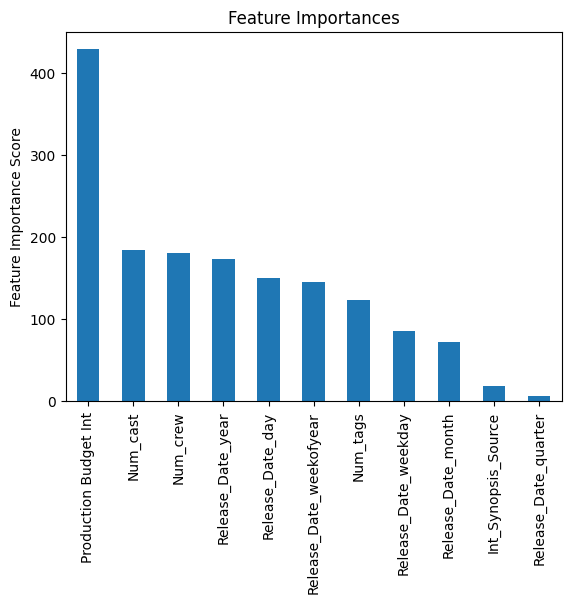

In [ ]:
#Choose all predictors except target & IDcols
import matplotlib.pyplot as plt
import xgboost as xgb
xgb1 = xgb.XGBRegressor(
    learning_rate =0.1,
    n_estimators=140,
    max_depth=4,
    min_child_weight=4,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=4,
    scale_pos_weight=1,
    seed=27)

y_pred=modelfit(xgb1, X_train, y_train, X_test, y_test)

In [ ]:
print(y_pred)

[ 2.4013228e+07 -2.7708352e+06 -1.3800344e+07 ...  9.3132704e+08
  6.8971128e+07  4.7001300e+07]


In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
y_test=y_test.reset_index(drop=True)

In [ ]:
X_test

,Production Budget Int,Num_cast,Num_crew,Num_tags,Int_Synopsis_Source,Release_Date_year,Release_Date_weekday,Release_Date_month,Release_Date_weekofyear,Release_Date_day,Release_Date_quarter
0,10000000,0,0,0,0,2017,4,10,43,27,4
1,250000,14,2,0,0,1999,4,1,1,8,1
2,200000,4,4,0,0,1980,0,12,49,1,4
3,500000,2,1,0,0,2015,1,4,16,14,2
4,200000,0,0,0,0,2007,4,10,42,19,4
...,...,...,...,...,...,...,...,...,...,...,...
1384,230000000,0,0,0,0,2017,1,5,21,23,2
1385,6400000,0,0,0,0,2021,4,2,7,19,1
1386,225000000,60,35,27,1,2013,1,7,27,2,3
1387,20000000,0,0,0,0,2017,4,1,3,20,1


# Expected Gross

In [ ]:
Expected_Gross=y_pred

# Finding profitability

In [ ]:
#Finding expected profitability for test set
def profitability(a,b):
  profit=[]
  l=len(a)
  for i in range(0,l):
    if (a[i]> b[i]):
      profit.append(1)
    else:
      profit.append(0)
  return profit

In [ ]:
expected_profitability=profitability(Expected_Gross,X_test['Production Budget Int'])

In [ ]:
actual_profitability=profitability(y_test,X_test['Production Budget Int'])

# Accuracy of finding profitability

In [ ]:
#Calculate accuracy
def finding_accuracy(a,b):
  l=len(a)
  cnt=0
  for i in range(0,l):
    if(a[i]==b[i]):
      cnt+=1

  accuracy=cnt/l
  return accuracy


In [ ]:
accuracy=finding_accuracy(actual_profitability,expected_profitability)

In [ ]:
print("Accuracy of finding profitability:" , accuracy)

Accuracy of finding profitability: 0.7544996400287977


In [ ]:
print("Accuracy (in percentage) of finding profitability:" , accuracy*100)

Accuracy (in percentage) of finding profitability: 75.44996400287977
